In [2]:
!pip install pandas numpy scikit-learn statsmodels

In [3]:
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS, Isomap, TSNE
from sklearn.metrics import pairwise_distances
import seaborn as sns


# Import des données 

In [57]:
participants_train = pd.read_csv(os.path.join("data", "train_participants.csv" ))
participants_train["set"] = 'train'
participants_test = pd.read_csv(os.path.join("data", "test_participants.csv" ))
participants_test["set"] = 'test'
participants = pd.concat([participants_train, participants_test])

In [5]:
rois_train = pd.read_csv(os.path.join("data", "train_rois.csv" ))
rois_train["set"] = 'train'
rois_test = pd.read_csv(os.path.join("data", "test_rois.csv" ))
rois_test["set"] = 'test'
rois = pd.concat([rois_train, rois_test])

In [6]:
test_vbm = np.load("data/test_vbm.npz",  allow_pickle=True)
train_vbm = np.load("data/train_vbm.npz",  allow_pickle=True)





# Exploration

Enseignements: 
Les dimensions spatiales de l'image (121 x 145 x 121) indiquent qu'il y a 121 coupes dans la direction axiale (de haut en bas du cerveau).


In [39]:
train_vbm.files

['imgs_arr', 'mask_arr', 'affine', 'participant_id']

In [40]:
for key in train_vbm.files:
    print(f"Key: {key}, Shape: {train_vbm[key].shape}, Dtype: {train_vbm[key].dtype}")


Key: imgs_arr, Shape: (410, 1, 121, 145, 121), Dtype: float64
Key: mask_arr, Shape: (121, 145, 121), Dtype: bool
Key: affine, Shape: (4, 4), Dtype: float64
Key: participant_id, Shape: (410,), Dtype: object


In [7]:
imgs_arr = train_vbm['imgs_arr'] #mages volumétriques ou des données IRM
print(imgs_arr[0, 0])
#[index participant,  dimension pour le canal, dimensions 1 spatiales en voxels,dimensions 2 spatiales en voxels, dimensions 1 spatiales en voxels ]

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
# masques pour sélectionner ou isoler la région d'intérêt (ROI, Region of Interest) 
# Des valeurs booléens (0 ou 1) indiquant si un voxel fait partie ou non de la région ciblée.
mask_arr = train_vbm['mask_arr'] 
print(mask_arr[40:50])

In [37]:
affine = train_vbm['affine'] #mages volumétriques ou des données IRM
print(affine)
#Permet de mapper les images volumétriques dans un espace standardisé.
# diagonale : échelles (scaling) sur chaque axe.
# dernière colonne translations (déplacement dans l'espace 3D).

[[  -1.5    0.     0.    90. ]
 [   0.     1.5    0.  -126. ]
 [   0.     0.     1.5  -72. ]
 [   0.     0.     0.     1. ]]


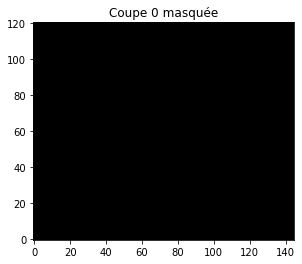

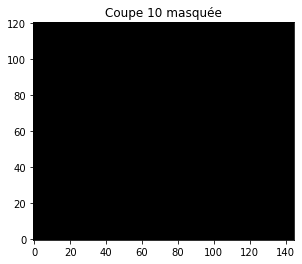

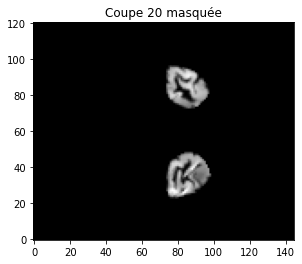

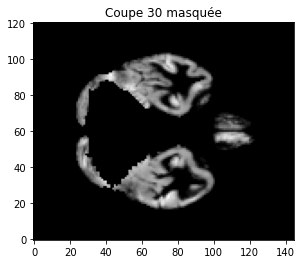

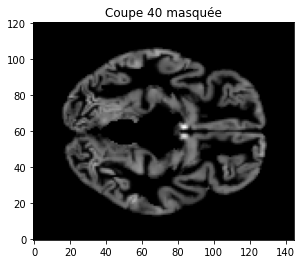

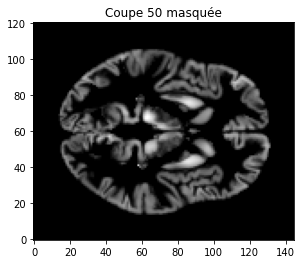

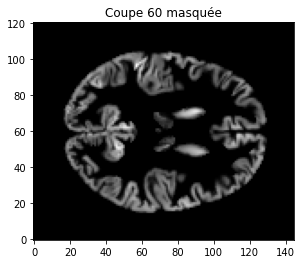

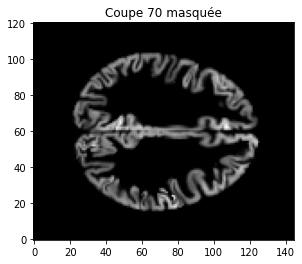

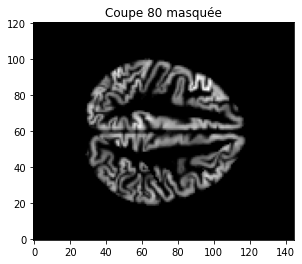

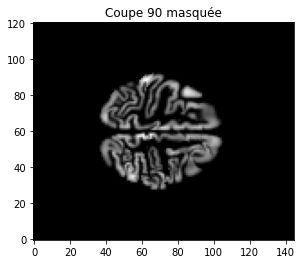

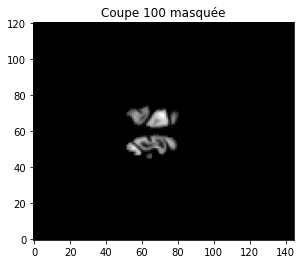

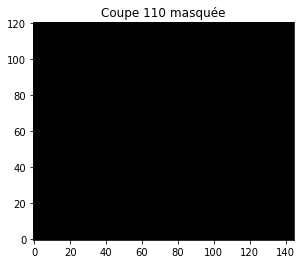

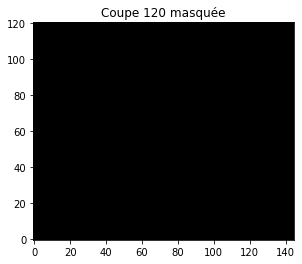

In [60]:
for idx in range(0, 121, 10):  # Parcourir toutes les 10 coupes
    plt.imshow(imgs_arr[0, 0][:, :, idx] * mask_arr[:, :, idx], cmap='gray', origin='lower')
    plt.title(f"Coupe {idx} masquée")
    plt.show()


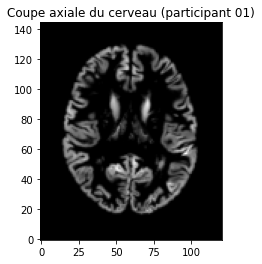

In [55]:
# Visualiser une coupe (slice) axiale du premier volume
volume = imgs_arr[0, 0]
slice_axial = volume[:, :, 60]  # 60ème coupe
plt.imshow(slice_axial.T, cmap='gray', origin='lower')
plt.title("Coupe axiale du cerveau (participant 01)")
plt.show()
#présenter la transformation spatiale entre l'espace des voxels (coordonnées de l'image) et un espace de référence standard

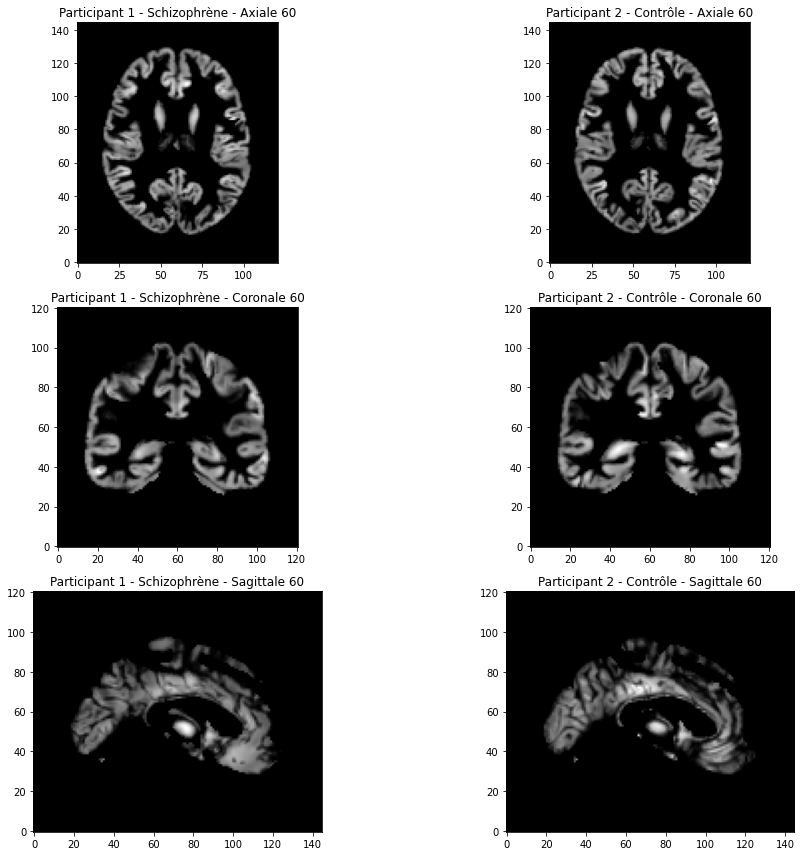

In [ ]:

imgs_arr = train_vbm['imgs_arr']
mask_arr = train_vbm['mask_arr']
participant_id = train_vbm['participant_id']

# Sélectionner deux participants
participant_1 = imgs_arr[100, 0]  # Volume 3D du participant 1 (schizophrène)
participant_2 = imgs_arr[2, 0]  # Volume 3D du participant 2 (contrôle)

# Masquer les données
masked_1 = participant_1[mask_arr]
masked_2 = participant_2[mask_arr]

# Index de coupe (vous pouvez en afficher plusieurs)
slice_idx = 60

# Extraire des coupes (axiale, coronale et sagittale)
masked_slice_axial_1 = participant_1[:, :, slice_idx] * mask_arr[:, :, slice_idx]
masked_slice_axial_2 = participant_2[:, :, slice_idx] * mask_arr[:, :, slice_idx]

masked_slice_coronal_1 = participant_1[:, slice_idx, :] * mask_arr[:, slice_idx, :]
masked_slice_coronal_2 = participant_2[:, slice_idx, :] * mask_arr[:, slice_idx, :]

masked_slice_sagittal_1 = participant_1[slice_idx, :, :] * mask_arr[slice_idx, :, :]
masked_slice_sagittal_2 = participant_2[slice_idx, :, :] * mask_arr[slice_idx, :, :]

# Tracer les graphiques
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Axiale
axes[0, 0].imshow(masked_slice_axial_1.T, cmap='gray', origin='lower')
axes[0, 0].set_title(f"Participant 1 - Schizophrène - Axiale {slice_idx}")
axes[0, 1].imshow(masked_slice_axial_2.T, cmap='gray', origin='lower')
axes[0, 1].set_title(f"Participant 2 - Contrôle - Axiale {slice_idx}")

# Coronale
axes[1, 0].imshow(masked_slice_coronal_1.T, cmap='gray', origin='lower')
axes[1, 0].set_title(f"Participant 1 - Schizophrène - Coronale {slice_idx}")
axes[1, 1].imshow(masked_slice_coronal_2.T, cmap='gray', origin='lower')
axes[1, 1].set_title(f"Participant 2 - Contrôle - Coronale {slice_idx}")

# Sagittale
axes[2, 0].imshow(masked_slice_sagittal_1.T, cmap='gray', origin='lower')
axes[2, 0].set_title(f"Participant 1 - Schizophrène - Sagittale {slice_idx}")
axes[2, 1].imshow(masked_slice_sagittal_2.T, cmap='gray', origin='lower')
axes[2, 1].set_title(f"Participant 2 - Contrôle - Sagittale {slice_idx}")

plt.tight_layout()
plt.show()

In [17]:
!pip install nibabel

In [26]:
# Charger le fichier des labels
labels_path = "AAL3v1.nii.txt"  
labels = {}

with open(labels_path, "r") as f:
    for line in f:
        idx, name = line.strip().split(maxsplit=1)
        labels[int(idx)] = name

# Exemple : Afficher les 5 premières régions
print("Labels des régions AAL :")
for i in range(1, 6):
    print(f"{i}: {labels[i]}")


Labels des régions AAL :
1: Precentral_L 1
2: Precentral_R 2
3: Frontal_Sup_2_L 3
4: Frontal_Sup_2_R 4
5: Frontal_Mid_2_L 5


In [44]:
frontal_regions = {idx: name for idx, name in labels.items() if "Frontal" in name}
print("Régions frontales :")
for idx, name in frontal_regions.items():
    print(f"{idx}: {name}")


Régions frontales :
3: Frontal_Sup_2_L 3
4: Frontal_Sup_2_R 4
5: Frontal_Mid_2_L 5
6: Frontal_Mid_2_R 6
7: Frontal_Inf_Oper_L 7
8: Frontal_Inf_Oper_R 8
9: Frontal_Inf_Tri_L 9
10: Frontal_Inf_Tri_R 10
11: Frontal_Inf_Orb_2_L 11
12: Frontal_Inf_Orb_2_R 12
19: Frontal_Sup_Medial_L 19
20: Frontal_Sup_Medial_R 20
21: Frontal_Med_Orb_L 21
22: Frontal_Med_Orb_R 22


Labels des régions AAL :
1: Precentral_L 1
2: Precentral_R 2
3: Frontal_Sup_2_L 3
4: Frontal_Sup_2_R 4
5: Frontal_Mid_2_L 5


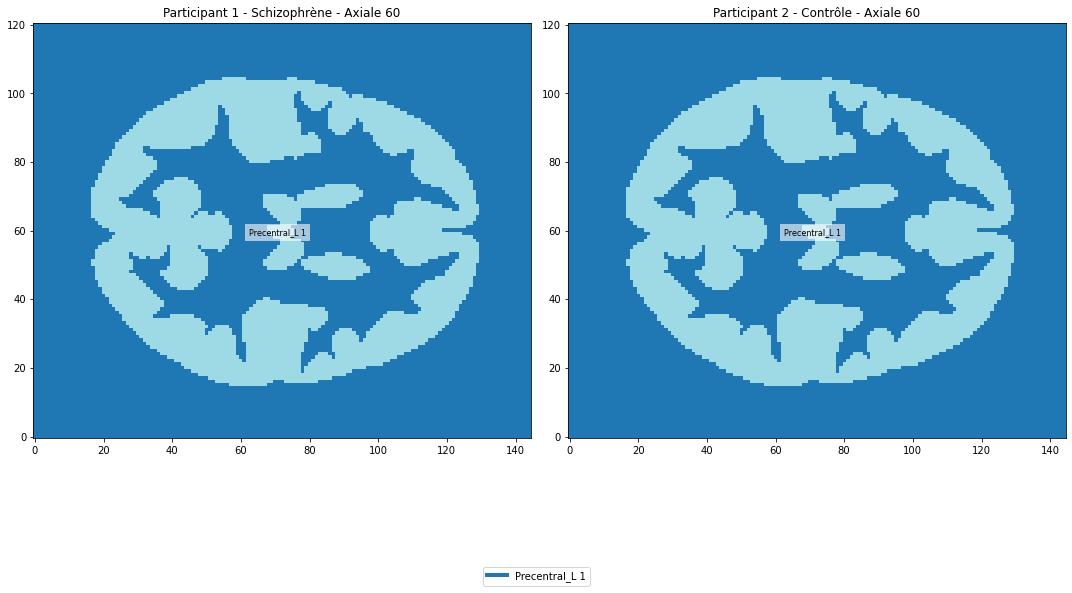

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Charger les labels AAL
labels_path = "AAL3v1.nii.txt"
labels = {}
with open(labels_path, "r") as f:
    for line in f:
        idx, name = line.strip().split(maxsplit=1)
        labels[int(idx)] = name

# Exemple : Afficher les 5 premières régions
print("Labels des régions AAL :")
for i in range(1, 6):
    print(f"{i}: {labels[i]}")

# Données
imgs_arr = train_vbm['imgs_arr']
mask_arr = train_vbm['mask_arr']
participant_id = train_vbm['participant_id']

# Sélectionner deux participants
participant_1 = imgs_arr[100, 0]  # Volume 3D du participant 1 (schizophrène)
participant_2 = imgs_arr[2, 0]  # Volume 3D du participant 2 (contrôle)

# Index de coupe (par exemple axiale)
slice_idx = 60

# Appliquer le masque AAL pour colorier les régions
aal_mask = mask_arr  # Masque avec les labels AAL pour chaque voxel
aal_axial_1 = aal_mask[:, :, slice_idx]
aal_axial_2 = aal_mask[:, :, slice_idx]

# Générer des couleurs uniques pour chaque région (labels)
unique_labels = np.unique(aal_mask)
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))  # Colormap avec 20 couleurs

# Créer une table de correspondance entre labels et couleurs
label_to_color = {label: colors[i] for i, label in enumerate(unique_labels)}

# Colorer les coupes axiales en fonction des labels AAL
colored_axial_1 = np.zeros((*aal_axial_1.shape, 4))  # 4 pour RGBA
colored_axial_2 = np.zeros((*aal_axial_2.shape, 4))

for label, color in label_to_color.items():
    colored_axial_1[aal_axial_1 == label] = color
    colored_axial_2[aal_axial_2 == label] = color

# Tracer les graphiques avec les régions colorées et noms affichés
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

axes[0].imshow(colored_axial_1, origin='lower')
axes[0].set_title(f"Participant 1 - Schizophrène - Axiale {slice_idx}")
axes[1].imshow(colored_axial_2, origin='lower')
axes[1].set_title(f"Participant 2 - Contrôle - Axiale {slice_idx}")

# Annoter les noms des zones directement sur le graphique
for ax, aal_slice in zip(axes, [aal_axial_1, aal_axial_2]):
    for label in unique_labels:
        if label in labels:
            # Trouver le centre approximatif de chaque région
            coords = np.argwhere(aal_slice == label)
            if len(coords) > 0:
                y, x = coords.mean(axis=0)  # Moyenne des coordonnées (centre)
                ax.text(x, y, labels[label], color="black", fontsize=8, ha="center", va="center",
                        bbox=dict(facecolor="white", edgecolor="none", alpha=0.6))

plt.tight_layout()

# Ajouter une légende
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
labels_legend = [labels[label] for label in unique_labels if label in labels]
fig.legend(handles, labels_legend, loc='center', bbox_to_anchor=(0.5, -0.1), ncol=4)

plt.show()


Labels des régions AAL :
1: Precentral_L 1
2: Precentral_R 2
3: Frontal_Sup_2_L 3
4: Frontal_Sup_2_R 4
5: Frontal_Mid_2_L 5


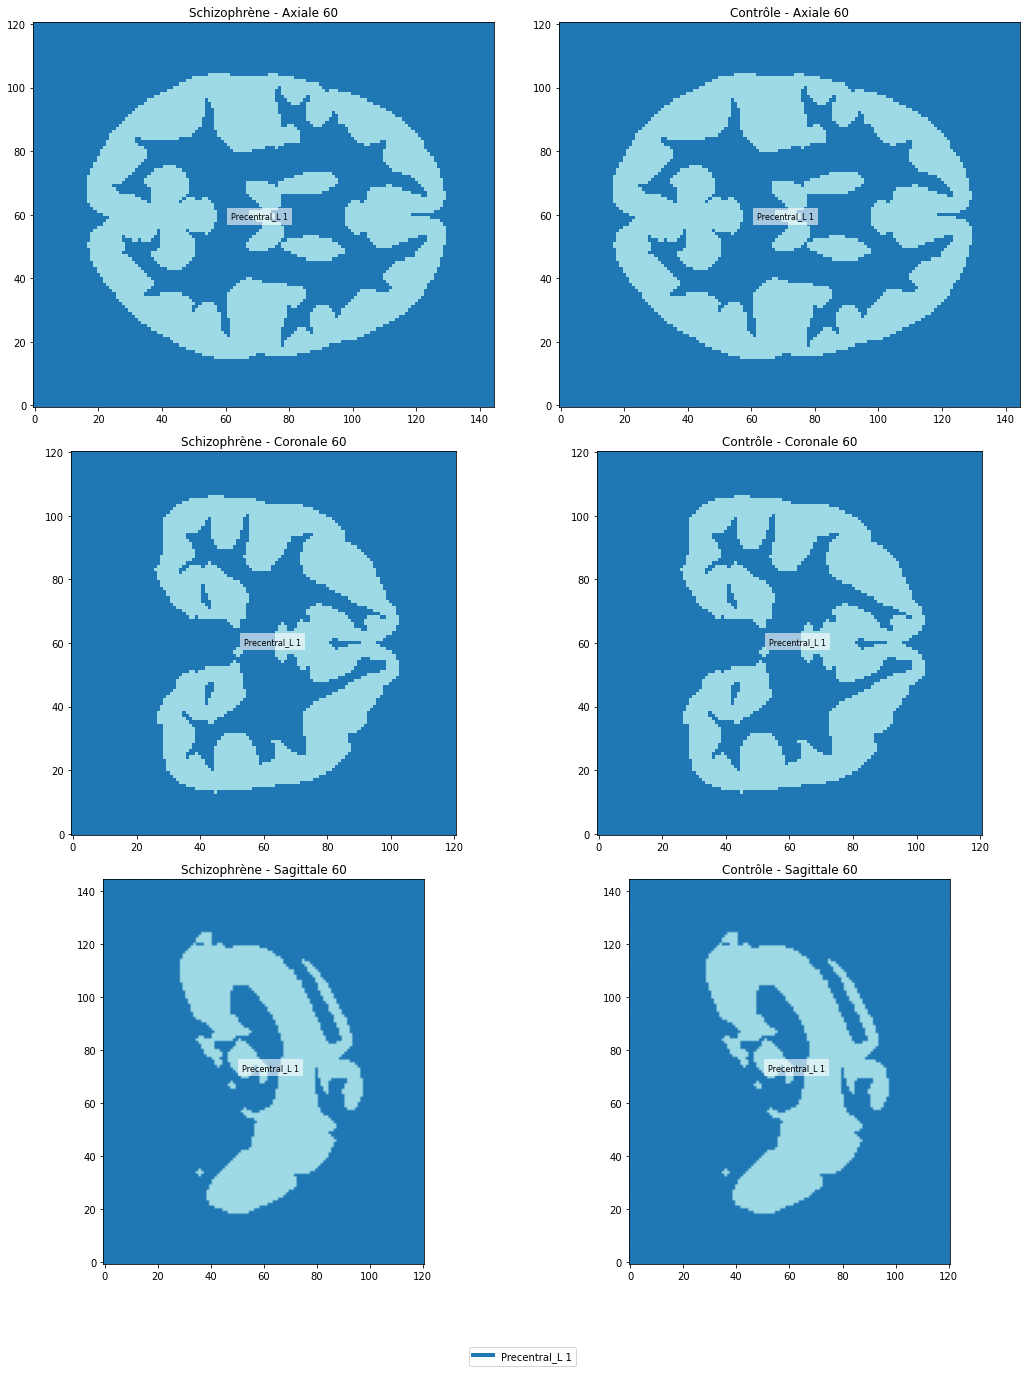

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Charger les labels AAL
labels_path = "AAL3v1.nii.txt"
labels = {}
with open(labels_path, "r") as f:
    for line in f:
        idx, name = line.strip().split(maxsplit=1)
        labels[int(idx)] = name

# Exemple : Afficher les 5 premières régions
print("Labels des régions AAL :")
for i in range(1, 6):
    print(f"{i}: {labels[i]}")

# Données
imgs_arr = train_vbm['imgs_arr']
mask_arr = train_vbm['mask_arr']
participant_id = train_vbm['participant_id']

# Sélectionner deux participants
participant_schizophrene = imgs_arr[0, 0]  # Volume 3D du participant 1 (schizophrène)
participant_control = imgs_arr[1, 0]      # Volume 3D du participant 2 (contrôle)

# Index de coupe
slice_idx = 60  # Index pour les coupes axiale, coronale, sagittale

# Appliquer les masques AAL pour chaque coupe (axiale, coronale, sagittale)
aal_axial_s = mask_arr[:, :, slice_idx]  # Schizophrène
aal_axial_c = mask_arr[:, :, slice_idx]  # Contrôle

aal_coronal_s = mask_arr[:, slice_idx, :]  # Schizophrène
aal_coronal_c = mask_arr[:, slice_idx, :]  # Contrôle

aal_sagittal_s = mask_arr[slice_idx, :, :]  # Schizophrène
aal_sagittal_c = mask_arr[slice_idx, :, :]  # Contrôle

# Créer des couleurs uniques pour chaque région (labels)
unique_labels = np.unique(mask_arr)
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))  # Palette avec 20 couleurs

# Table de correspondance entre labels et couleurs
label_to_color = {label: colors[i] for i, label in enumerate(unique_labels)}

# Fonction pour colorier les coupes selon les labels
def color_slice(slice_data):
    colored_slice = np.zeros((*slice_data.shape, 4))  # RGBA
    for label, color in label_to_color.items():
        colored_slice[slice_data == label] = color
    return colored_slice

# Générer les coupes colorées
colored_axial_s = color_slice(aal_axial_s)
colored_axial_c = color_slice(aal_axial_c)

colored_coronal_s = color_slice(aal_coronal_s)
colored_coronal_c = color_slice(aal_coronal_c)

colored_sagittal_s = color_slice(aal_sagittal_s)
colored_sagittal_c = color_slice(aal_sagittal_c)

# Tracer les graphiques
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Axiale
axes[0, 0].imshow(colored_axial_s, origin='lower')
axes[0, 0].set_title(f"Schizophrène - Axiale {slice_idx}")
axes[0, 1].imshow(colored_axial_c, origin='lower')
axes[0, 1].set_title(f"Contrôle - Axiale {slice_idx}")

# Coronale
axes[1, 0].imshow(colored_coronal_s, origin='lower')
axes[1, 0].set_title(f"Schizophrène - Coronale {slice_idx}")
axes[1, 1].imshow(colored_coronal_c, origin='lower')
axes[1, 1].set_title(f"Contrôle - Coronale {slice_idx}")

# Sagittale
axes[2, 0].imshow(colored_sagittal_s, origin='lower')
axes[2, 0].set_title(f"Schizophrène - Sagittale {slice_idx}")
axes[2, 1].imshow(colored_sagittal_c, origin='lower')
axes[2, 1].set_title(f"Contrôle - Sagittale {slice_idx}")

# Annoter les régions pour chaque coupe
def annotate_regions(ax, slice_data, aal_slice):
    for label in unique_labels:
        if label in labels:
            # Trouver le centre approximatif de chaque région
            coords = np.argwhere(aal_slice == label)
            if len(coords) > 0:
                y, x = coords.mean(axis=0)  # Moyenne des coordonnées
                ax.text(x, y, labels[label], color="black", fontsize=8, ha="center", va="center",
                        bbox=dict(facecolor="white", edgecolor="none", alpha=0.6))

# Annoter chaque graphique
annotate_regions(axes[0, 0], colored_axial_s, aal_axial_s)
annotate_regions(axes[0, 1], colored_axial_c, aal_axial_c)

annotate_regions(axes[1, 0], colored_coronal_s, aal_coronal_s)
annotate_regions(axes[1, 1], colored_coronal_c, aal_coronal_c)

annotate_regions(axes[2, 0], colored_sagittal_s, aal_sagittal_s)
annotate_regions(axes[2, 1], colored_sagittal_c, aal_sagittal_c)

plt.tight_layout()

# Ajouter une légende globale
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
labels_legend = [labels[label] for label in unique_labels if label in labels]
fig.legend(handles, labels_legend, loc='center', bbox_to_anchor=(0.5, -0.05), ncol=4)

plt.show()


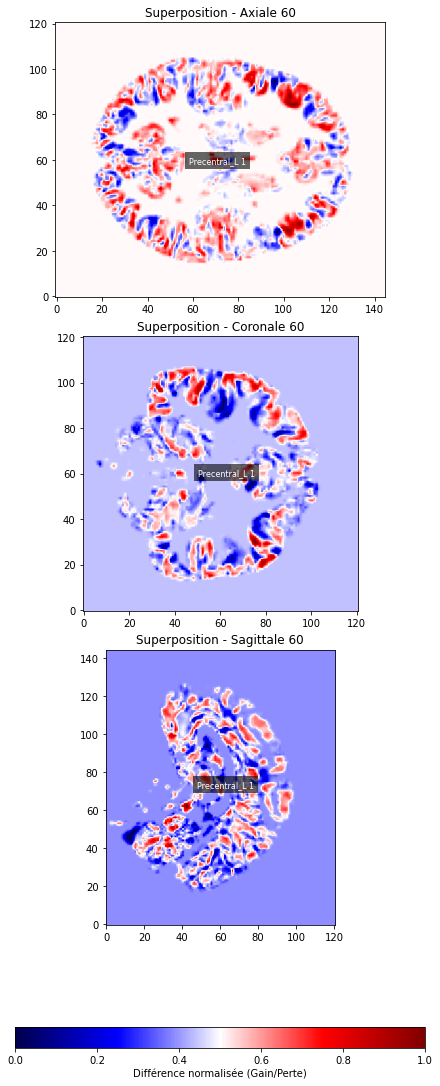

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Charger les labels AAL
labels_path = "AAL3v1.nii.txt"
labels = {}
with open(labels_path, "r") as f:
    for line in f:
        idx, name = line.strip().split(maxsplit=1)
        labels[int(idx)] = name

# Données
imgs_arr = train_vbm['imgs_arr']
mask_arr = train_vbm['mask_arr']
participant_id = train_vbm['participant_id']

# Sélectionner deux participants
participant_schizophrene = imgs_arr[102, 0]  # Volume 3D du participant 1 (schizophrène)
participant_control = imgs_arr[2, 0]      # Volume 3D du participant 2 (contrôle)

# Calcul de la différence volumétrique
volume_difference = participant_control - participant_schizophrene

# Normaliser la différence pour qu'elle soit visible
normalized_diff = (volume_difference - np.min(volume_difference)) / (np.max(volume_difference) - np.min(volume_difference))

# Index de coupe
slice_idx = 60

# Extraire les coupes (axiale, coronale, sagittale) pour la superposition
diff_axial = normalized_diff[:, :, slice_idx]
diff_coronal = normalized_diff[:, slice_idx, :]
diff_sagittal = normalized_diff[slice_idx, :, :]

# Appliquer le masque AAL pour les régions touchées
aal_axial = mask_arr[:, :, slice_idx]
aal_coronal = mask_arr[:, slice_idx, :]
aal_sagittal = mask_arr[slice_idx, :, :]

# Tracer les graphiques
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Couleurs pour la superposition (bleu = gain, rouge = perte)
cmap = plt.cm.seismic  # Bleu -> Rouge

# Axiale
axes[0].imshow(diff_axial, cmap=cmap, origin='lower')
axes[0].set_title(f"Superposition - Axiale {slice_idx}")

# Coronale
axes[1].imshow(diff_coronal, cmap=cmap, origin='lower')
axes[1].set_title(f"Superposition - Coronale {slice_idx}")

# Sagittale
axes[2].imshow(diff_sagittal, cmap=cmap, origin='lower')
axes[2].set_title(f"Superposition - Sagittale {slice_idx}")

# Ajouter les annotations pour chaque région (avec AAL)
def annotate_regions(ax, slice_data, aal_slice):
    for label in np.unique(aal_slice):
        if label in labels:  # Vérifier si le label a un nom
            # Trouver le centre de la région
            coords = np.argwhere(aal_slice == label)
            if len(coords) > 0:
                y, x = coords.mean(axis=0)  # Moyenne des coordonnées
                ax.text(x, y, labels[label], color="white", fontsize=8, ha="center", va="center",
                        bbox=dict(facecolor="black", edgecolor="none", alpha=0.6))

# Annoter chaque coupe
annotate_regions(axes[0], diff_axial, aal_axial)
annotate_regions(axes[1], diff_coronal, aal_coronal)
annotate_regions(axes[2], diff_sagittal, aal_sagittal)

plt.tight_layout()
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=axes, orientation='horizontal', fraction=0.02, pad=0.1, label="Différence normalisée (Gain/Perte)")

plt.show()


In [62]:
import numpy as np
# Calculer l'intensité moyenne pour chaque participant dans le masque
means = [np.mean(imgs_arr[i, 0][mask_arr]) for i in range(len(participant_id))]
print("Moyennes d'intensité par participant du participant 1 :", means)


Moyennes d'intensité par participant du participant 1 : [0.5777527121092003, 0.5612688340549861, 0.5132661687182153, 0.43742632909045714, 0.5491648599570551, 0.5839842581718732, 0.5030590944652399, 0.4719058095305855, 0.4859660103627416, 0.5203618916729326, 0.4507563055326465, 0.5615099722043572, 0.5159483163374862, 0.4788552960776947, 0.4267872491511695, 0.4264187910993381, 0.5624535393039437, 0.4821816216341416, 0.4916589562325946, 0.40764712726692104, 0.4705971065903841, 0.5109688301049129, 0.6045655458236202, 0.46022361438337117, 0.4049215307998888, 0.5459153708799553, 0.4884179441143642, 0.520007869279092, 0.4534611647809105, 0.37688689184079016, 0.4898336908280705, 0.41545082407242506, 0.5901257498472269, 0.5048100298273489, 0.5075114368134235, 0.5771121401308182, 0.4565627977246489, 0.44769418443903547, 0.4340095353481411, 0.4908737084582792, 0.6003024039953615, 0.5047625021081652, 0.3669643572936844, 0.46259114505358756, 0.3956133806943512, 0.3990581708642859, 0.446436331429234

In [ ]:
print(test_vbm['key1'][:5])  # Affiche les 5 premiers éléments


In [12]:
rois_train.head(5)

,participant_id,session,run,TIV,CSF_Vol,GM_Vol,WM_Vol,l3thVen_GM_Vol,r3thVen_GM_Vol,l4thVen_GM_Vol,...,lSupParLo_CSF_Vol,rSupParLo_CSF_Vol,lSupTemGy_CSF_Vol,rSupTemGy_CSF_Vol,lTemPo_CSF_Vol,rTemPo_CSF_Vol,lInfFroAngGy_CSF_Vol,rInfFroAngGy_CSF_Vol,lTemTraGy_CSF_Vol,rTemTraGy_CSF_Vol
0,CH7098a,V1,1,1712.357084,375.529152,747.089338,586.391159,0.063950,0.058779,0.062019,...,7.488130,8.622047,2.465118,2.656249,6.584050,6.213031,1.787291,2.043806,0.406808,0.403986
1,A00024535,V1,1,1700.601735,399.493745,721.128411,579.446172,0.047534,0.044989,0.053391,...,9.022685,8.544778,2.439144,2.533854,6.849889,6.730247,1.945829,2.325559,0.312825,0.426095
2,CC7563,V1,1,1449.327365,220.825294,661.028439,566.500051,0.118209,0.088380,0.069014,...,4.219249,4.258448,1.394717,1.773845,3.537319,3.663182,1.007794,0.856915,0.162711,0.193604
3,CC3945,V1,1,1184.699000,201.579922,560.051329,423.016129,0.102882,0.084044,0.044932,...,3.678205,3.383453,1.346163,1.897148,3.623939,3.865042,1.237802,1.206910,0.218570,0.204934
4,CH8853b,V1,1,1518.198466,291.544632,705.384606,520.807601,0.067550,0.065347,0.047114,...,7.231215,7.043181,2.161728,2.069372,3.730283,4.239948,1.418323,1.626568,0.278396,0.292313


In [64]:
# Extraire les indices des schizophrènes et des contrôles
schizophrenia_indices = participants.index[participants['diagnosis'] == 'schizophrenia'].tolist()
control_indices = participants.index[participants['diagnosis'] == 'control'].tolist()


## Réduction de dimension

Le but est de trouver l'atrophie.

### Multi-dimensional Scaling (MDS)

MDS tente de trouver des projections de dimension K des observation, concaténés dans une matrice de sorte que dij ≈ ‖xi −xj‖ soient aussi proches que possible.

In [ ]:

def compute_dissimilarity_matrix(data, metric='euclidean'):
    """Calcule la matrice de dissimilarité avec une métrique donnée."""
    return pairwise_distances(data, metric=metric)

def apply_mds(dissimilarity_matrix, n_components=2, random_state=40):
    """Applique MDS sur une matrice de dissimilarité."""
    mds = MDS(dissimilarity='precomputed', n_components=n_components, random_state=random_state, max_iter=3000, eps=1e-9)
    return mds.fit_transform(dissimilarity_matrix)

def rotate_and_flip(data, theta_degrees=80):
    """Applique une rotation et un retournement sur des données en 2D."""
    theta = theta_degrees * np.pi / 180.0
    rot = np.array([[np.cos(theta), -np.sin(theta)],
                    [np.sin(theta), np.cos(theta)]])
    data_rotated = np.dot(data, rot)
    data_rotated[:, 0] *= -1
    return data_rotated

def plot_2d(data, title="Projection des données", labels=None):
    """Trace des données en 2D avec des étiquettes facultatives."""
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], s=50)
    if labels is not None:
        for i, label in enumerate(labels):
            plt.text(data[i, 0], data[i, 1], label, fontsize=8)
    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)
    plt.show()

def compute_stress_for_k(dissimilarity_matrix, k_range):
    """Calcule le stress pour différentes valeurs de k dans MDS."""
    return [MDS(dissimilarity='precomputed', n_components=k, random_state=42, max_iter=300, eps=1e-9).fit(dissimilarity_matrix).stress_ for k in k_range]

def plot_stress(k_range, stress_values):
    """Trace l'évolution du stress en fonction de k."""
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, stress_values, marker='o', label="Stress")
    plt.xlabel("Nombre de composantes (k)")
    plt.ylabel("Stress")
    plt.title("Évolution du stress en fonction du nombre de composantes")
    plt.legend()
    plt.grid(True)
    plt.show()


In [102]:
D = compute_dissimilarity_matrix(rois_to_reduce_dimension)
print("Shape de la matrice de dissimilarité :", D.shape)

Shape de la matrice de dissimilarité : (513, 513)


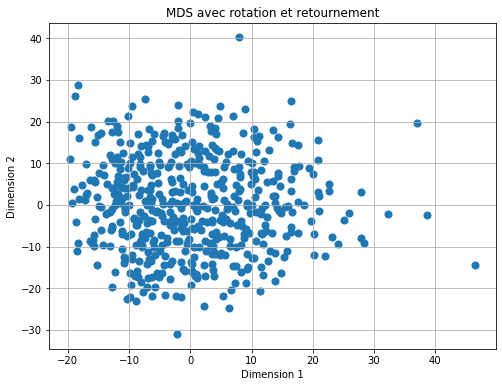

In [104]:
X_mds = apply_mds(D)
X_mds_rotated = rotate_and_flip(X_mds)
plot_2d(X_mds_rotated, "MDS avec rotation et retournement")
    

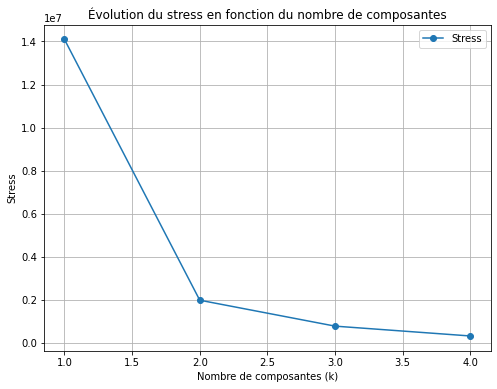

In [105]:
k_range = range(1, min(5, D.shape[0] - 1))
stress = compute_stress_for_k(D, k_range)
plot_stress(k_range, stress)
    

### ISOMAP

Isomap est une méthode de réduction de dimensionnalité non linéaire qui combine une procédure de calcul de la matrice de distance avec MDS. Le calcul des distances est basé sur les distances géodésiques évaluées sur le graphique de voisinage

Isomap, LLE et les variantes sont les mieux adaptées pour déplier un seul collecteur continu de faible dimension

In [106]:
def apply_isomap(data, n_neighbors=10, n_components=2):
    """Applique Isomap sur les données."""
    isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
    return isomap.fit_transform(data)


In [107]:
X_isomap = apply_isomap(rois_to_reduce_dimension)


### TSNE

t-SNE se concentrera sur la structure locale des données et aura tendance à extraire des groupes locaux d’échantillons groupés. Nous cherchons justement le groupe local où il y aurait de l'atrophie. C'est la méthode retenue.

SI t-SNE est utilisé à partir de bibliothèques comme sklearn, alors il n'est pas nécessaire de construire manuellement les probabilités gaussiennes entre les paires. Cela est géré automatiquement par l'algorithme


In [124]:
def apply_tsne(data, n_components=2, perplexity=30, random_state=0):
    """Applique t-SNE sur les données."""
    tsne = TSNE(n_components=n_components, init='pca', random_state=random_state, perplexity=perplexity)
    return tsne.fit_transform(data)

In [125]:
try:
     X_tsne = apply_tsne(rois_to_reduce_dimension)
except KeyboardInterrupt:
    print("t-SNE interrompu automatiquement.")
    X_tsne = None
    

c:\Users\lucas\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\lucas\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


### Comparaison 

In [111]:
def plot_comparison(data_list, titles, colors=None):
    """Trace plusieurs projections en parallèle pour comparaison."""
    fig, axes = plt.subplots(1, len(data_list), figsize=(15, 5))
    for i, data in enumerate(data_list):
        axes[i].scatter(data[:, 0], data[:, 1], c=colors, cmap=plt.cm.Spectral, s=50)
        axes[i].set_title(titles[i])
        axes[i].set_xlabel("Dimension 1")
        axes[i].set_ylabel("Dimension 2")
    plt.tight_layout()
    plt.show()

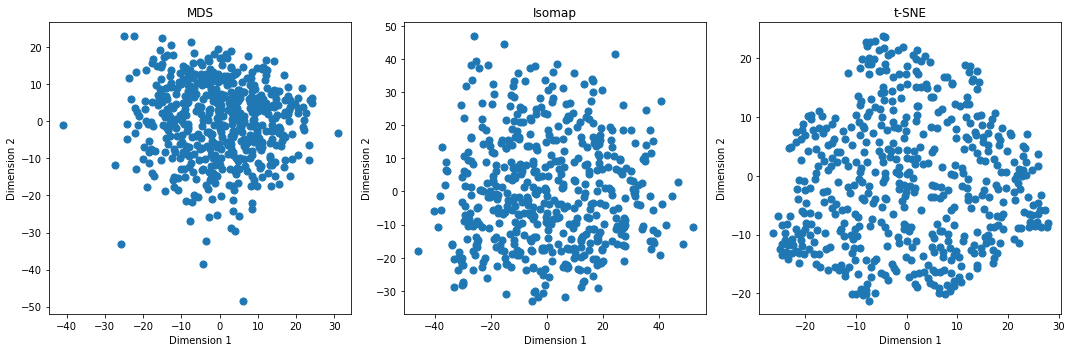

In [109]:
if X_tsne is not None:
        plot_comparison([X_mds, X_isomap, X_tsne], ["MDS", "Isomap", "t-SNE"])
else:
        plot_comparison([X_mds, X_isomap], ["MDS", "Isomap"])

t-SNE se concentrera sur la structure locale des données et aura tendance à extraire des groupes locaux d’échantillons groupés. Nous cherchons justement le groupe local où il y aurait de l'atrophie. C'est la méthode retenue.

# Traitement table

## Application de la réduction de dimension

In [147]:
rois_to_reduce_dimension = rois.drop(columns=["set"], axis=1).loc[:, 'l3thVen_GM_Vol':]

In [327]:
def apply_tsne(data, n_components=2, perplexity=30, random_state=0):
    """Applique t-SNE sur les données."""
    tsne = TSNE(n_components=n_components, init='pca', random_state=random_state, perplexity=perplexity)
    return tsne.fit_transform(data)

try:
     X_tsne = apply_tsne(rois_to_reduce_dimension)
except KeyboardInterrupt:
    print("t-SNE interrompu automatiquement.")
    X_tsne = None
    
IRM_reduced = pd.DataFrame(X_tsne, columns=['IRM_1', 'IRM_2'], index=rois_to_reduce_dimension.index)


c:\Users\lucas\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\lucas\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [328]:
columns_to_remove = rois.drop(columns=["set"], axis=1).loc[:, 'l3thVen_GM_Vol':].columns
rois_reduced = rois.drop(columns=columns_to_remove, axis=1)

In [ ]:
rois_with_IRM_reduced = pd.concat([rois_reduced, IRM_reduced], axis=1)

# Afficher le résultat final
print(rois_with_IRM_reduced.head())

## Creation d'une feature sur l'atrophie

Objectif : créer un indice du nombre de partie du cerveau particulièrements atrophiés

In [ ]:
columns_a_flaguer = rois.drop(columns=["set"], axis=1).loc[:, 'l3thVen_GM_Vol':].columns

def find_atrophies(df, columns, percentile=0.01):
    atrophy_flags = pd.DataFrame(index=df.index)  # DataFrame pour stocker les résultats
    for col in columns:
        # Calculer la valeur correspondant au percentile (1% ou autre)
        threshold = df[col].quantile(percentile)
        
        # Marquer les observations en dessous de ce seuil (1 = atrophie, 0 = pas d'atrophie)
        atrophy_flags[col] = (df[col] <= threshold).astype(int)  # Utilisation de 1 pour atrophie et 0 pour pas d'atrophie
        
    return atrophy_flags

atrophy_flags = find_atrophies(rois, columns_a_flaguer, percentile=0.01)
rois_atrophy = pd.concat([rois_with_IRM_reduced, atrophy_flags], axis=1)
rois_atrophy['num_flags_atrophie'] = atrophy_flags.sum(axis=1)
rois_with_IRM_reduced_and_flags = rois_atrophy.drop(columns=columns_a_flaguer,axis=1)

In [ ]:
rois_with_IRM_reduced_and_flags

In [ ]:
print(rois_with_IRM_reduced_and_flags['num_flags_atrophie'].describe())
plt.figure(figsize=(8, 6))
sns.boxplot(x=rois_traitee['num_flags_atrophie'], color='lightcoral')
plt.title('Boxplot du nombre de flags activés')
plt.xlabel('Nombre de flags activés')
plt.grid(True)
plt.show()


## Traitements préliminaires pour la prévision

1. suprimer variable "session", "study", "participant_id"
2. créer variable adolescent et jeune adulte 
3. Binariser la variable "diagnosis" : 1 si "schizophrenia", 0 sinon
4. Encodage de "site" en variables indicatrices (dummy variables)


In [ ]:

# Supprimer les colonnes "session", "study", "participant_id"
participants_traitee= participants.drop(columns=["session", "study"])

# Créer une nouvelle colonne binaire pour les adolescents et jeunes adultes
participants_traitee["young_adult"] = participants_traitee["age"].apply(lambda x: 1 if x <= 25 and  x >= 18 else 0)
participants_traitee["adolescent"] = participants_traitee["age"].apply(lambda x: 1 if x < 18 and  x >= 10 else 0)

# Binariser la variable "diagnosis" : 1 si "schizophrenia", 0 sinon
participants_traitee["schizophrenia"] = participants_traitee["diagnosis"].apply(lambda x: 1 if x == "schizophrenia" else 0)
participants_traitee= participants_traitee.drop(columns=["diagnosis"])

#Encodage de "site" en variables indicatrices (dummy variables)
participants_traitee = pd.get_dummies(participants_traitee, columns=["site"], drop_first=True)


print(participants_traitee.head())

In [334]:
rois_with_IRM_reduced_and_flags_traitee= rois_with_IRM_reduced_and_flags.drop(columns=["set","TIV","CSF_Vol","GM_Vol","WM_Vol", "session","run"])
print(rois_with_IRM_reduced_and_flags_traitee.head())

  participant_id      IRM_1      IRM_2  num_flags_atrophie
0        CH7098a  18.716761   8.060318                   5
1      A00024535  12.830871  16.099773                   5
2         CC7563   8.595231 -12.277903                   8
3         CC3945 -17.882517 -15.052787                  11
4        CH8853b  15.068323   5.816479                   6


## Ajout des informations traitees des IRM (rois) à la table des participants

In [335]:
# Fusionner les DataFrames participants_traitee et rois_with_IRM_reduced_and_flags sur 'participant_id' avec un merge à gauche
participants_enrichi_with_rois_traitee = pd.merge(participants_traitee, rois_with_IRM_reduced_and_flags_traitee, on='participant_id', how='left')

assert participants_enrichi_with_rois_traitee.shape[0]==513


In [336]:
participants_enrichi_with_rois_traitee = participants_enrichi_with_rois_traitee.drop(columns=["participant_id"],axis=1)

## train et test

In [337]:
# Diviser les données en train et test selon la variable "set"
train_data = participants_enrichi_with_rois_traitee[participants_enrichi_with_rois_traitee["set"] == "train"] 
test_data = participants_enrichi_with_rois_traitee[participants_enrichi_with_rois_traitee["set"] == "test"]

# Définir les variables explicatives (X) et la cible (y)
X_train = train_data.drop(columns=["schizophrenia", "set"])  # Supprimez la cible et la colonne "set"
y_train = train_data["schizophrenia"]

X_test = test_data.drop(columns=["schizophrenia", "set"])
y_test = test_data["schizophrenia"]


# Modélisation

## Modèle Base line

In [338]:
X_train_with_intercept = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_with_intercept)
logit_result = logit_model.fit()
print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.566405
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          schizophrenia   No. Observations:                  410
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                           13
Date:                Tue, 24 Dec 2024   Pseudo R-squ.:                  0.1788
Time:                        00:00:23   Log-Likelihood:                -232.23
converged:                       True   LL-Null:                       -282.78
Covariance Type:            nonrobust   LLR p-value:                 1.013e-15
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.1952      3.904      1.587      0.113      -1.456      13.847
sex  

In [339]:

# Initialiser et entraîner le modèle
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, C=0.1)  # L2 est le défaut
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]  

In [340]:
# Afficher les coefficients du modèle
coefficients = model.coef_[0]  
variables = X_train.columns  

coef_df = pd.DataFrame({
    'Variable': variables,
    'Coefficient': coefficients
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print(coef_df)


              Variable  Coefficient  Abs_Coefficient
0                  sex    -0.705061         0.705061
8              site_NU     0.240816         0.240816
9           site_WUSTL     0.231122         0.231122
6          young_adult     0.218576         0.218576
7           adolescent    -0.086869         0.086869
4               GM_Vol    -0.082576         0.082576
2                  TIV     0.068925         0.068925
5               WM_Vol    -0.057515         0.057515
3              CSF_Vol    -0.055851         0.055851
11               IRM_2    -0.054767         0.054767
1                  age    -0.046975         0.046975
10               IRM_1    -0.032410         0.032410
12  num_flags_atrophie     0.019608         0.019608


In [341]:
# Métriques
rmse = np.sqrt(mean_squared_error(y_test, y_pred_proba))
print(f"RMSE : {rmse:.4f}")

precision = precision_score(y_test, model.predict(X_test))
print(f"Precision : {precision:.4f}")


recall = recall_score(y_test, model.predict(X_test))
print(f"Recall : {recall:.4f}")

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC : {auc:.4f}")



RMSE : 0.4608
Precision : 0.7045
Recall : 0.6458
AUC : 0.7231
